## Convolutional Neural Network "from scratch"



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications import VGG16, EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
from IPython.display import Image
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

In [4]:
tf.config.experimental.list_physical_devices('GPU')

[]

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [1]:
# if you are using google colab for this task you can mount your GoogleDrive as follows: 
from google.colab import drive
drive.mount('/content/drive/')

# After running this cell you should enter the authorization code from your Google account

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [9]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):
from pathlib import Path
import os

base = Path("../data/Cats_and_Dogs")
train = base / "train"
val = base / "val"
test = base / "test"

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# batch size
batch_size = 64
# train set size
nb_train_samples = 20000
# validation set size 
nb_validation_samples = 2490
# test set size
nb_test_samples = 2500

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function for training deep neural networks _ImageGenerator_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [10]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


use generator for training the model ("fit" method analog)
```python
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)
```

Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Operation model.add (Dropout (0.5)) - excludes a neuron from the current layer with a 50% probability to avoid overfitting. retraining.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [11]:
def build_model():
    model = Sequential()

    # 1: +Convolutional
    model.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=input_shape))
    model.add(Activation('relu'))
    # 2: +Pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Activation('relu'))
    # 3: +Convolutional
    model.add(Conv2D(32, (3, 3), activation='relu'))
    # 4:  +Pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # 5:  +Convolutional
    model.add(Conv2D(64, (3, 3), activation='relu'))
    # 6:  +Pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # 7:  +Flattening
    model.add(Flatten())
    # 8: +FCL
    model.add(Dense(64, activation = 'relu'))
    # 9:  +Dropout
    model.add(Dropout(0.5))
    # 10: +FCL
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return model

In [13]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.

model = build_model()
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=20, #try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1] * 100))

Epoch 1/20
312/312 [==============================] - 151s 483ms/step - loss: 0.6163 - accuracy: 0.6510 - val_loss: 0.5433 - val_accuracy: 0.7442
Epoch 2/20
312/312 [==============================] - 152s 486ms/step - loss: 0.5083 - accuracy: 0.7557 - val_loss: 0.4685 - val_accuracy: 0.7808
Epoch 3/20
312/312 [==============================] - 142s 454ms/step - loss: 0.4581 - accuracy: 0.7899 - val_loss: 0.4448 - val_accuracy: 0.8022
Epoch 4/20
312/312 [==============================] - 145s 465ms/step - loss: 0.4110 - accuracy: 0.8174 - val_loss: 0.4217 - val_accuracy: 0.8137
Epoch 5/20
312/312 [==============================] - 146s 468ms/step - loss: 0.3704 - accuracy: 0.8377 - val_loss: 0.3887 - val_accuracy: 0.8273
Epoch 6/20
312/312 [==============================] - 141s 451ms/step - loss: 0.3295 - accuracy: 0.8563 - val_loss: 0.4058 - val_accuracy: 0.8203
Epoch 7/20
312/312 [==============================] - 145s 464ms/step - loss: 0.2972 - accuracy: 0.8736 - val_loss: 0.3953 -

We will just train once with 20 epochs and than draw a single graph. Training several times from scratch using different number of epochs doesn't really make much sense. Also, I used separate function for model building so that it is created fresh in the same cell as the training loop, otherwise keras will just continue learning the same model, in many cases then is not what we want

In [17]:
def draw_history(history):
    fig, ax = plt.subplots(2, 1, figsize=(15, 10))
    ax[0].set_title('Accuracy')
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'test'])

    ax[1].set_title('Loss')
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'test'])

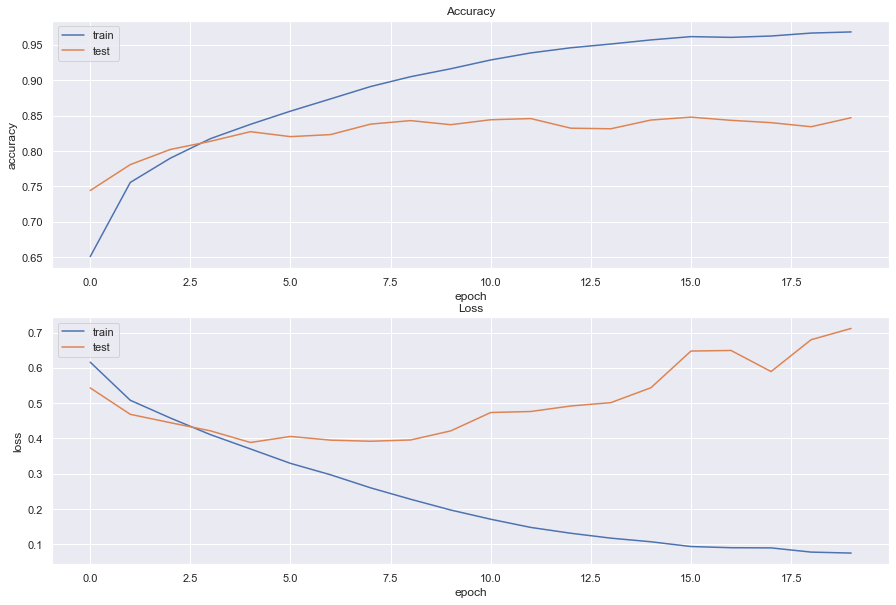

In [20]:
draw_history(history)

As we can see that is actually no point in training beyond 7-8 epochs for this arhitecture

![alt text](Deeper.jpeg )

##  

Let's try to improve the quality of recognition, using the method of transfer lerning - "transfer training." 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with another avaliable pre-trained deep learning model from keras application.
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to)

**Build pretrained VGG-16**

In [23]:
vgg16_net = VGG16(
    weights='imagenet', 
    include_top=False,
    input_shape=input_shape
)
vgg16_net.trainable = False
vgg16_net.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [24]:
def build_pretrained(pretrained):
    model = Sequential()
    # 1:  +VGG16 backbone
    model.add(pretrained)

    # 2:  +Flattening
    model.add(Flatten())
    # 3:  +Dense
    model.add(Dense(256, activation="relu"))
    # 4:  +Dropout
    model.add(Dropout(0.3))
    # 5:  +Dense
    model.add(Dense(1, activation="sigmoid"))

    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=1e-5), 
        metrics=['accuracy']
    )
    
    print(model.summary())

    return model

E.g., it was like:


![alt text](VGG16.png )

and it becomes:

![alt text](VGG162.png )

**Evaluate VGG-16**

In [29]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

pretrained_vgg = build_pretrained(vgg16_net)
pretrained_vgg_history = pretrained_vgg.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=1,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

scores = pretrained_vgg.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________
None
 10/312 [..............................] - ETA: 17:32 - loss: 0.7597 - accuracy: 0.4688

KeyboardInterrupt: 

In [30]:
draw_history(pretrained_vgg_history)

NameError: name 'pretrained_vgg_history' is not defined

**Build pretrained EfficientNetB0**

In [27]:
efficientNetB0_net = EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=input_shape
)
efficientNetB0_net.trainable = False
efficientNetB0_net.summary()

e_expand[0][0]          
__________________________________________________________________________________________________
block5b_project_conv (Conv2D)   (None, 10, 10, 112)  75264       block5b_se_excite[0][0]          
__________________________________________________________________________________________________
block5b_project_bn (BatchNormal (None, 10, 10, 112)  448         block5b_project_conv[0][0]       
__________________________________________________________________________________________________
block5b_drop (Dropout)          (None, 10, 10, 112)  0           block5b_project_bn[0][0]         
__________________________________________________________________________________________________
block5b_add (Add)               (None, 10, 10, 112)  0           block5b_drop[0][0]               
                                                                 block5a_project_bn[0][0]         
____________________________________________________________________________________

In [28]:
pretrained_efficientNetB0 = build_pretrained(efficientNetB0_net)
pretrained_efficientNetB0_history = pretrained_efficientNetB0.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=1,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

scores = pretrained_efficientNetB0.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 5, 5, 1280)        4049571   
_________________________________________________________________
flatten_2 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               8192256   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 12,242,084
Trainable params: 8,192,513
Non-trainable params: 4,049,571
_________________________________________________________________
None
 20/312 [>.............................] - ETA: 4:43 - loss: 0.7275 - accuracy: 0.4883

KeyboardInterrupt: 

In [ ]:
draw_history(pretrained_efficientNetB0_history)

#### Evaluate on single unseen image 

In [31]:
def predict_single(model, image_path: str):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (img_width, img_height))
    pred = model.predict(image[np.newaxis, ...])[0][0]
    return pred

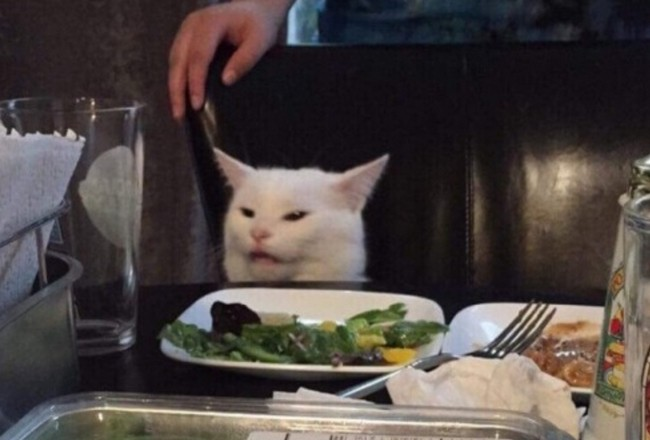

In [32]:
sample_image = "totally_unseen_cat.jpg" 
Image("totally_unseen_cat.jpg")

In [33]:
vgg_cat_pred = predict_single(pretrained_vgg, sample_image)
if vgg_cat_pred < 0.5:
    print("VGG says it's a cat! ;)")
else:
    print("See meme below")

See meme below


In [34]:
effB0_cat_pred = predict_single(pretrained_efficientNetB0, sample_image)
if effB0_cat_pred < 0.5:
    print("EfficientNetB0 says it's a cat! ;)")
else:
    print("See meme below")

EfficientNetB0 says it's a cat! ;)


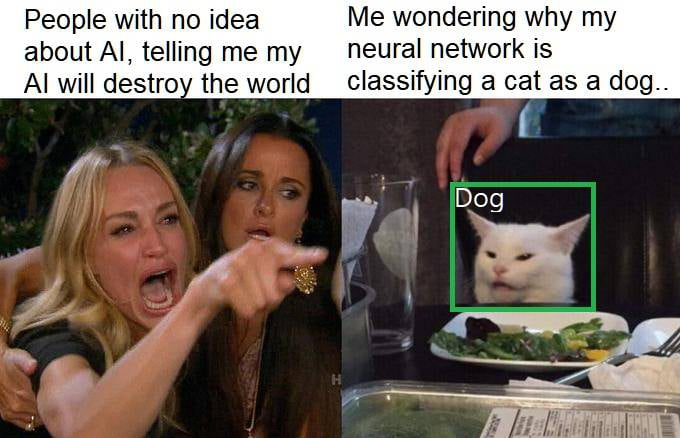

In [36]:
Image("meme.jpg")